In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

### Data Load
- 'PL04496-03040' (prod_list[0]) 제품만을 대상으로
- 정상 데이터만으로 학습
- 전체 데이터로 테스트

In [2]:
isee_machine = pd.read_csv('./data/isee_machine_middle_NG_inter_MapNorm_combined_label.csv')
prod_list = isee_machine.ProductNum.unique()

# prod_list[0] 제품에 대해서만 분석
isee_machine = isee_machine[isee_machine.ProductNum == prod_list[0]]    

analy_col = ['CycleTime', 'VpPosition', 'VpTime',
        'VpPressure', 'MaxInjectionPressure', 'InjectionEndPosition',
        'PlasticizingTime', 'PlasticsEndPosotion', 'ClampingTime',
        'MouldOpeningTime', 'HotOilContoller', 'TankTemp', 'NozzleTemp',
        'Zone1', 'Zone2', 'Zone3', 'Zone4'] 
isee_machine['NG_Label'] = isee_machine['NG'] + isee_machine['NG5']

### Scaler

In [3]:
from sklearn.preprocessing import RobustScaler

# Initialize a scaler using the training data.
isee_machine[analy_col] = RobustScaler().fit_transform(isee_machine[analy_col])

### feature selection

In [61]:
from sklearn.ensemble import RandomForestClassifier

X = isee_machine[analy_col]
Y = isee_machine['NG']
names = analy_col

rf = RandomForestClassifier()
rf.fit(X, Y)
print("Features sorted by their score:")
rst = pd.DataFrame(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True))

C:\Users\ARA\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Features sorted by their score:


In [62]:
from sklearn.metrics import confusion_matrix

In [63]:
print(confusion_matrix(Y, rf.predict(X)))

[[54307     6]
 [  531  2860]]


In [64]:
rst

,0,1
0,0.1384,PlasticizingTime
1,0.1153,InjectionEndPosition
2,0.1073,CycleTime
3,0.0868,VpTime
4,0.0747,HotOilContoller
5,0.0660,MaxInjectionPressure
6,0.0629,ClampingTime
7,0.0560,VpPressure
8,0.0529,NozzleTemp
9,0.0511,Zone4


In [58]:
rst[0][:11].sum()

0.8457000000000001

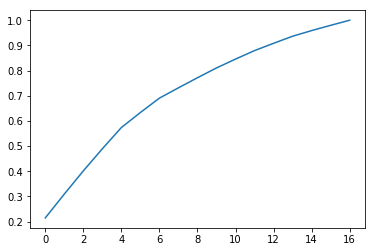

In [51]:
plt.plot(rst[0].cumsum())